## CheatSheet for ADP

In [11]:
# 공통
import warnings
warnings.filterwarnings('ignore')

# EDA를 위한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML을 위한 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import model_selection


# 통계분석을 위한 라이브러리
import scipy
from statsmodels.api import stats


In [2]:
df = pd.read_csv('problem1.csv')

### EDA

#### 자료형, 결측치 확인 : df.info()
* null 개수 확인 : df.isnull().sum()
* 결측치 제거 : df.dropna(inplace = True) | df.dropna(subset = ['column1', 'columns2'])
* 기초통계량 확인 : df.describe()

In [5]:
print(df.isnull().sum())
df.dropna(inplace = True)

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64


#### 이상치 확인(boxplot)

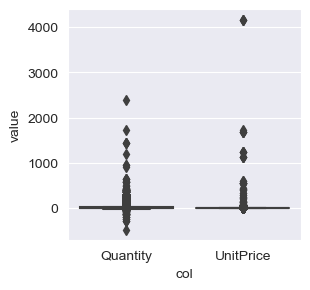

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35679 entries, 0 to 35800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    35679 non-null  object 
 1   StockCode    35679 non-null  object 
 2   Description  35679 non-null  object 
 3   Quantity     35679 non-null  float64
 4   InvoiceDate  35679 non-null  object 
 5   UnitPrice    35679 non-null  float64
 6   CustomerID   35679 non-null  float64
 7   Country      35679 non-null  object 
dtypes: float64(3), object(5)
memory usage: 2.4+ MB


In [6]:
# boxplot을 통해 이상치 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

x = df[['Quantity', 'UnitPrice']]

x_melt = pd.melt(x, var_name='col', value_name='value')

plt.figure(figsize=(3, 3))
sns.boxplot(x='col', y='value', data = x_melt)
plt.xticks(range(2), x.columns)
plt.show()

df.info()

In [8]:
# 이상치를 가져오는 함수 정의 후 이상치의 위치와 값 확인해보기
import numpy as np

def outliers_iqr(dt, col):
    quantile_1, quantile_3 = np.percentile(dt[col], [25, 75])
    iqr = quantile_3-quantile_1
    lower_whis = quantile_1-1.5*iqr
    upper_whis = quantile_3+1.5*iqr
    outliers = dt[(dt[col]>upper_whis)|(dt[col]<lower_whis)]
    return outliers[[col]]

outliers_Quantity = outliers_iqr(df, 'Quantity')
print(outliers_Quantity)
outliers_UnitPrice = outliers_iqr(df, 'UnitPrice')
print(outliers_UnitPrice)

print('Quantity 변수의 이상치 비율 : ', round(100*len(outliers_Quantity)/len(df), 2), '%')
print('UnitPrice 변수의 이상치 비율 : ', round(100*len(outliers_UnitPrice)/len(df), 2), '%')

       Quantity
7          48.0
20        288.0
24        120.0
25        144.0
30         60.0
...         ...
35753      48.0
35769     288.0
35777      36.0
35783     160.0
35791     120.0

[3721 rows x 1 columns]
       UnitPrice
8          15.95
13         18.00
15          7.95
29         15.00
35         65.00
...          ...
35773      18.00
35774      18.00
35786    1241.98
35794      18.00
35800       9.95

[4332 rows x 1 columns]
Quantity 변수의 이상치 비율 :  10.43 %
UnitPrice 변수의 이상치 비율 :  12.14 %


In [9]:
# 이상치 제거
# 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터에 비해 많지 않은 경우 이상치가 존재하는 행 전체를 삭제할 수 있다.

drop_outliers = df.drop(index=outliers_Quantity.index)
drop_outliers = df.drop(index=outliers_UnitPrice.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original : ', df.shape)
print('Drop outliers : ', drop_outliers.shape)

Original :  (35679, 8)
Drop outliers :  (31347, 8)


#### 상관계수 히트맵

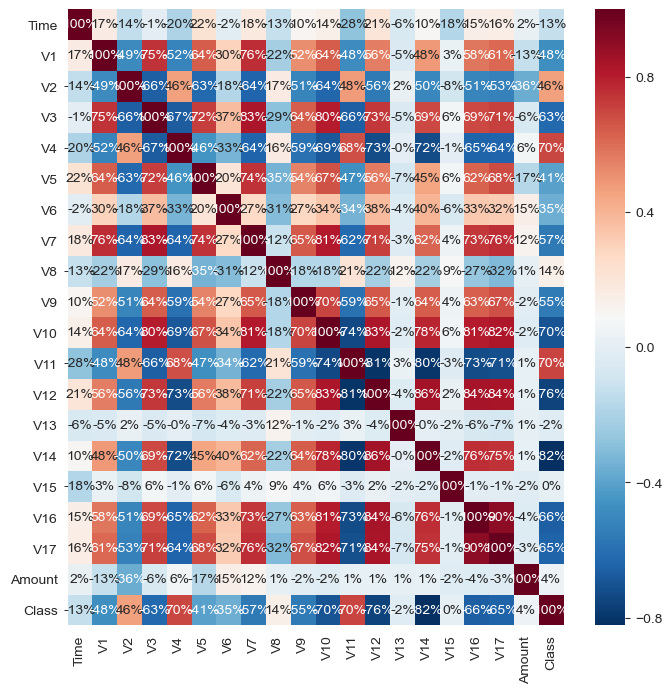

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr(method = 'pearson')
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, xticklabels=df.columns, yticklabels=df.columns, cmap='RdBu_r', annot=True, fmt='.0%')
plt.show()

#### 기타

In [3]:
# 각 피처별로 몇 가지의 속성을 갖는지 확인

for i in pd.Series(df.columns) :
    unique = pd.Series(df[i].unique())
    if unique.index.stop <10:
        print(i, '유니크')
        print(unique.index)

Class 유니크
RangeIndex(start=0, stop=2, step=1)


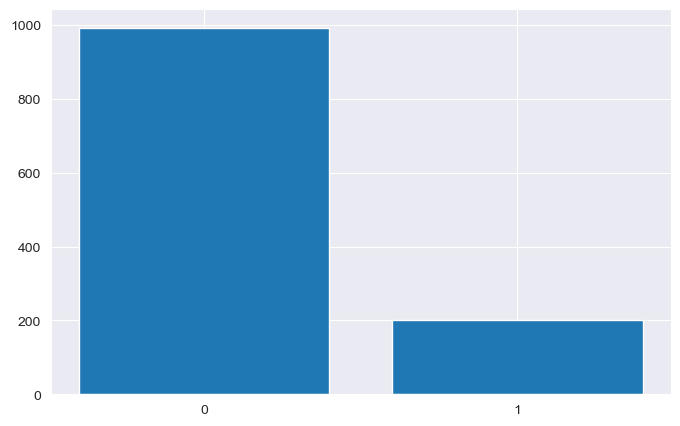

Class 데이터 불균형
Class : 0	 0.8323554065381391
Class : 1	 0.16764459346186086


In [4]:
# class에 따른 데이터 불균형 확인
import matplotlib.pyplot as plt

df['Class'] = df['Class'].astype('str')

plt.figure(figsize = (8, 5))
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values)
plt.show()

print('Class 데이터 불균형')
print('Class : 0\t', len(df[df['Class'] == '0']) / len(df))
print('Class : 1\t', len(df[df['Class'] == '1']) / len(df))

df['Class'] = df['Class'].astype('int')

#### 주성분 분석
* 주성분 분석을 위해서는 scaling이 선행되어야 한다.

In [19]:
# PCA 진행
# 설명변수와 종속변수 분리

x = df[df.columns.difference(['Class'])]
y = df['Class']

# StandardScaling 진행
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

pca = PCA(n_components = 10, random_state = 731)
pca.fit(x_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:7].sum())
# 기존 19개의 설명변수에서 7주성분까지 사용하면, 전체 데이터의 83.6%를 설명할 수 있음을 알 수 있다.

result_pca = PCA(n_components = 7, random_state = 731)
x_scaled_pca = pd.DataFrame(result_pca.fit_transform(x_scaled), columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7'])
x_scaled_pca

[0.48856528 0.06877926 0.06740491 0.06068848 0.05897547 0.04973451
 0.04187768 0.0350807  0.02420063 0.02270812]
0.8360255972986641


,p1,p2,p3,p4,p5,p6,p7
0,-0.865003,-1.467341,-0.399325,-0.194634,1.372621,0.521872,-0.301514
1,2.585035,-1.092992,-0.878476,-0.854288,1.083653,-0.008949,-1.019354
2,-1.227620,1.044931,0.179199,0.604110,3.061203,-0.819376,-0.096817
3,-0.722942,-2.927350,1.472325,-0.974058,0.934983,-0.002921,0.906362
4,-1.259335,-1.508933,-0.068735,0.351317,2.901062,0.034803,0.619901
...,...,...,...,...,...,...,...
1188,-1.220381,0.132786,-0.257042,0.244148,-1.427011,-0.077240,1.080794
1189,-1.355346,0.207966,-0.532338,-0.070727,-1.174919,0.393451,1.392620
1190,-1.429854,0.346963,-0.084313,0.306085,-1.322735,0.075860,1.052777
1191,-0.564871,1.683795,1.657680,2.214772,-1.060194,0.547957,-0.558149


#### 오버샘플링(Random Oversampling, SMOTE)

In [20]:
# 종속변수인 Class에 대하여 Random Oversamplig, SMOTE 진행

from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state = 731)
smt = SMOTE(random_state = 731)

import time
# Random Oversampling
ros_start_time = time.tim|e() # 시작 시간
x_ros, y_ros = ros.fit_resample(x_scaled_pca, y)
ros_end_time = time.time() # 종료 시간
print('ros_time : ', ros_end_time - ros_start_time)

# SMOTE
smt_start_time = time.time() # 시작 시간
x_smt, y_smt = smt.fit_resample(x_scaled_pca, y)
smt_end_time = time.time() # 종료 시간
print('smt_time : ', smt_end_time - smt_start_time)

ModuleNotFoundError: No module named 'sklearn.neighbors.base'

In [8]:
# 모델 RandomForest Classification을 이용하여 정확도 측면에서의 성능 차이 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_clf = RandomForestClassifier(n_estimators = 300, max_depth = 10, criterion = 'entropy')

# train, test 분리
from sklearn.model_selection import train_test_split

# ros
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size = 0.3, stratify = y_ros, random_state = 731)

# smt
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(x_smt, y_smt, test_size = 0.3, stratify = y_smt, random_state = 731)

import time

# 1. ros
ros_start_time = time.time()
rf_clf.fit(x_train_ros, y_train_ros)
ros_end_time = time.time()
ros_pred = rf_clf.predict(x_test_ros)

print('Accuracy : ', rf_clf.score(x_test_ros, y_test_ros))
print('time : ', ros_end_time - ros_start_time, 'seconds')

# 2. smt
smt_start_time = time.time()
rf_clf.fit(x_train_smt, y_train_smt)
smt_end_time = time.time()
smt_pred = rf_clf.predict(x_test_smt)

print('Accuracy : ', rf_clf.score(x_test_smt, y_test_smt))
print('time : ', smt_end_time - smt_start_time, 'seconds')

NameError: name 'x_ros' is not defined